In [11]:
# Importing libraries and setting up the environment
import warnings

warnings.filterwarnings("ignore")  # setting ignore as a parameter
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from mpl_toolkits.basemap import Basemap
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from scipy.stats import f_oneway
from statsmodels.genmod.families import Binomial
from matplotlib.colors import ListedColormap
from scipy.stats import linregress
from scipy.stats import mannwhitneyu
from scipy.stats import kendalltau

image_format = "svg"

In [12]:
# Function to read in data

grid_area = pd.read_csv("../data/grid_area.csv", names=["LON","LAT","AREA"])
def process_data(filepath):
    fire = pd.read_csv(
        filepath,
        names=[
            "STATUS",
            "LON",
            "LAT",
            "COUNT",
            "ICOHORT",
            "POTVEG",
            "SUBTYPE",
            "MONTH",
            "YEAR",
            "VEGC",
            "RH",
            "VSM",
            "WILTP",
            "AWACAP",
            "THETA",
            "THETA_E",
        ],
    )
    
    fire=fire.merge(grid_area, on=["LON","LAT"], how="left")
    fire["POTVEG"] = fire["POTVEG"].replace(4, "Boreal Forests")
    fire["POTVEG"] = fire["POTVEG"].replace(8, "Mixed Temperate Forests")
    fire["POTVEG"] = fire["POTVEG"].replace(9, "Temperate Coniferous Forests")
    fire["POTVEG"] = fire["POTVEG"].replace(10, "Temperate Decidous Forests")
    fire["POTVEG"] = fire["POTVEG"].replace(13, "Short Grasslands")
    fire["POTVEG"] = fire["POTVEG"].replace(15, "Arind Shrublands")
    fire["POTVEG"] = fire["POTVEG"].replace(19, "Xeromophic Forests & Woodlands")
    fire["POTVEG"] = fire["POTVEG"].replace(33, "Temperate Broadleaf Evergreen Forests")

    fire = fire[["LON", "LAT", "POTVEG", "MONTH", "YEAR", "AREA"]]

    fire_count = pd.DataFrame()
    fire_count["BURN"] = fire.groupby(["YEAR"])["YEAR"].count()
    fire_count = fire_count.reset_index()
    
    burn_area= pd.DataFrame()
    burn_area["AREA"] = fire.groupby(["YEAR"])["AREA"].sum()
    
    burn_area = burn_area.reset_index()

    fire_data = fire_count.merge(burn_area, on=["YEAR"], how="left")
    return fire_data


# Variables of interest


# Set Shared paths

shared_root_path = (
    "/processing/"
)
# .csv files for all models share the same path except for the model name
data_shared_path = "/data/FIRE.csv"


In [13]:
# Import Data


# Australia
fire_model_1 = process_data(
    shared_root_path + "australia" + data_shared_path
)  # fire



# Canada
fire_model_2 = process_data(shared_root_path + "canada" + data_shared_path)  # fire



# China
fire_model_3 = process_data(shared_root_path + "china" + data_shared_path)  # fire


# France
fire_model_4 = process_data(shared_root_path + "france" + data_shared_path)  # fire


# Japan
fire_model_5 = process_data(shared_root_path + "japan" + data_shared_path)  # fire


# Norway
fire_model_6 = process_data(shared_root_path + "norway" + data_shared_path)  # fire


# United Kingdom
fire_model_7 = process_data(
    shared_root_path + "united_kingdom" + data_shared_path
)  # fire




# United States CCSM4
fire_model_8 = process_data(
    shared_root_path + "united_states_1" + data_shared_path
)  # fire


# United States GFDL
fire_model_9 = process_data(
    shared_root_path + "united_states_2" + data_shared_path
)  # fire

fire_model_1.head()

,YEAR,BURN,AREA
0,2015,180,414550
1,2016,43,95626
2,2017,19,42493
3,2018,49,105748
4,2019,3,6612


In [14]:
# Function to aggregate data
def aggregate_data(models):
    all_models= pd.concat(models)
    
    fire_data= (all_models.groupby([ "YEAR"]).agg({"BURN": "mean", "AREA":"mean"}).reset_index())
    
   
   
    return fire_data

In [15]:
# Variables to list of future models dataframes
fire_models = [
    fire_model_1,
    fire_model_2,
    fire_model_3,
    fire_model_4,
    fire_model_5,
    fire_model_6,
    fire_model_7,
    fire_model_8,
    fire_model_9,
]


In [16]:
# Aggregate data
agg_fires = aggregate_data(fire_models)


agg_fires.head()



,YEAR,BURN,AREA
0,2015,198.111111,453328.555556
1,2016,29.111111,64241.888889
2,2017,21.888889,49834.888889
3,2018,17.444444,38734.666667
4,2019,8.250000,18570.625000


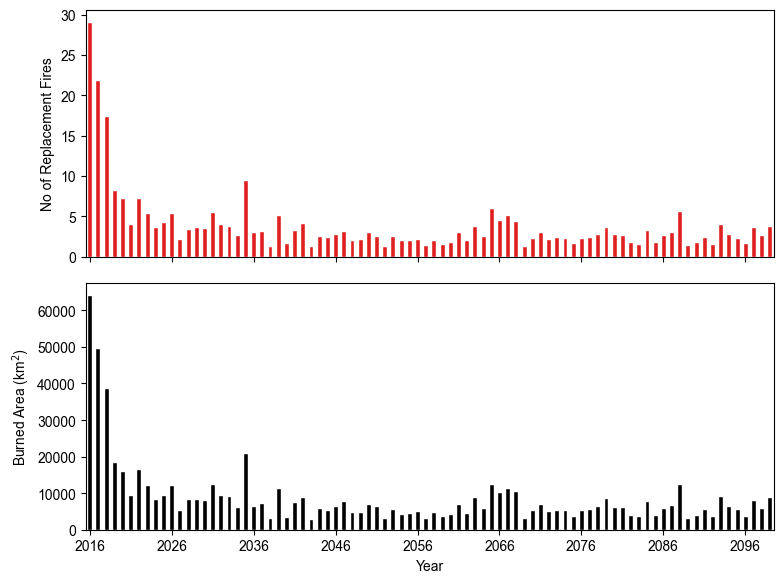

In [17]:
fires_mod = agg_fires.query("YEAR >= 2016")
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
sns.set_theme(style="ticks", font="sans-serif", rc={"lines.linewidth": 2})


# plot barplot with color and width parameters
a=sns.barplot(x="YEAR", y="BURN", data=fires_mod, color="red", width=0.6,ax=ax1)

b = sns.barplot(x="YEAR", y="AREA", data=fires_mod, color="black", width=0.6,ax=ax2)

ax1.xaxis.set_major_locator(MultipleLocator(10))
ax2.xaxis.set_major_locator(MultipleLocator(10))

ax1.set_ylabel("No of Replacement Fires")
ax2.set_ylabel("Burned Area (km$^2$)")
ax1.set_xlabel("")
ax2.set_xlabel("Year")



plt.tight_layout(pad=1.5, w_pad=1.5, h_pad=1.5)
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["xtick.top"] = False
plt.rcParams["xtick.direction"] = "out"
plt.rcParams["xtick.minor.size"] = 5
plt.rcParams["xtick.major.size"] = 10
plt.rcParams["xtick.minor.visible"] =False
plt.rcParams["ytick.right"] = False
plt.rcParams["ytick.direction"] = "out"
plt.rcParams["ytick.minor.size"] = 5
plt.rcParams["ytick.major.size"] = 10
plt.rcParams["ytick.minor.visible"] = False
plt.rcParams["figure.autolayout"] = True

plt.savefig("../figures/fires.svg", dpi=1200, bbox_inches="tight")